Pair programming Beautiful Soup
- Enunciado: Escribe una función llamada scrape_coches_ocasion que acepta una URL como argumento y devuelve un DataFrame de pandas con información sobre coches de ocasión encontrados en la página web especificada. La función realizará las siguientes tareas:
- Realizará una solicitud HTTP GET a la siguiente url.

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re

In [2]:
url_coches = "https://www.ocasionplus.com/coches-ocasion?type%3DCAR%26sort%3DFECHAOP_DESC%26page%3D2"

In [3]:
# hacemos requests
res_coches = requests.get(url_coches)

In [4]:
#llamada
res_coches.status_code

200

<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8" class="next-head"/>
  <title class="next-head">
   Coches de segunda mano, ocasión y seminuevos | OcasionPlus
  </title>
  <meta class="next-head" content="4000 coches de ocasión y segunda mano con descuentos de hasta 6000€, la mejor relación calidad-precio garantizada." name="description"/>
  <meta class="next-head" content="noindex, follow, noarchive" name="robots"/>
  <meta class="next-head" content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link class="next-head" href="/static/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link class="next-head" href="/static/favicon/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
  <link class="next-head" href="/static/favicon/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
  <link class="next-head" href="/static/favicon/favicon-194x194.png" rel="icon" sizes="194x194" type="image/png"/>
  <link class="next-head" href="/static/f
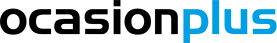

In [6]:
sopa_coches = BeautifulSoup(res_coches.content, 'html.parser')
print(sopa_coches.prettify())

3- Extraerá los nombres de los coches, los precios rebajados, los precios originales y la información de los kilómetros recorridos de la página.


nombre coche- <h2 style = 

In [10]:
lista_nombre_coches = sopa_coches.find_all("h2",{"style": "overflow-x:hidden"})

lista_nombre_coches [:2]


[<h2 style="overflow-x:hidden">Ford Kuga 1.5 EcoBlue ST-Line  (120 CV)</h2>,
 <h2 style="overflow-x:hidden">Peugeot 3008 SUV PureTech 130 S&amp;S Allure (130 CV)</h2>]

In [11]:
#queremos sacar los nombres
lista_nombre_coches[0].text

'Ford Kuga 1.5 EcoBlue ST-Line  (120 CV)'

In [12]:
nombre_coches = []
for nombre in lista_nombre_coches:
    nombre_coches.append(nombre.text)
nombre_coches[:5]


['Ford Kuga 1.5 EcoBlue ST-Line  (120 CV)',
 'Peugeot 3008 SUV PureTech 130 S&S Allure (130 CV)',
 'SEAT Arona 1.0 TSI Style Go2(110 CV)',
 'Dacia Dokker Essential 1.6 (110CV) ECO-G N1 GLP',
 'Hyundai i40 1.7 CRDI BlueDrive Tecno (115 CV)']

In [13]:
# buscamos "precio_rebajado"

precio_rebajado = sopa_coches.find_all("span", {"class":"jsx-2689423372 price"})
precio_rebajado [:2]

[<span class="jsx-2689423372 price">25.273<!-- -->€</span>,
 <span class="jsx-2689423372 price">19.045<!-- -->€</span>]

In [14]:
precio_rebajado[0].text

'25.273€'

In [15]:
precios_rebajados = []

for precio in precio_rebajado:
    precios_rebajados.append(precio.text)
precios_rebajados[:2]

['25.273€', '19.045€']

In [16]:
#Precio_original
#<span class="jsx-2870186023 priceLast">11.990<!-- -->€</span>

precio_original = sopa_coches.find_all("span", {"class":"jsx-2870186023 priceLast"})
precio_original [:2]


[<span class="jsx-2870186023 priceLast">27.800<!-- -->€</span>,
 <span class="jsx-2870186023 priceLast">20.950<!-- -->€</span>]

In [17]:
precio_original[0].text

'27.800€'

In [18]:
precios_originales = []

for precio in precio_original:
    precios_originales.append(precio.text)
precios_originales[:2]

['27.800€', '20.950€']

In [19]:
# "km": Kilómetros recorridos.
#57.556 km
#tenemos 102 filas 
lista_km = sopa_coches.find_all("span", {"class":"jsx-3960002075 detail big"})
#queremos acceder a la linia 2
km = []
for elemento in lista_km:
    km.append(elemento.text)
km[:10]

['08/2022',
 '5 km',
 'Diésel',
 'Manual',
 'Único propietario',
 '07/2021',
 '77.805 km',
 'Gasolina',
 'Manual',
 'Libro Mantenimiento']

In [20]:
km_definitivos = []
for k in km:
    if "km" in k:
        km_definitivos.append(k)
km_definitivos


['5 km',
 '77.805 km',
 '75.826 km',
 '34.416 km',
 '60.743 km',
 '48.783 km',
 '15.687 km',
 '61.645 km',
 '63.274 km',
 '126.648 km',
 '48.940 km',
 '48.949 km',
 '59.920 km',
 '69.992 km',
 '149.404 km',
 '30.865 km',
 '64.256 km',
 '24.049 km',
 '103.937 km',
 '43.290 km']

In [21]:
"km"in "5678 km" 


True

In [60]:
#otra manera es hacerlo con regex ()
nueva_lista = []
for i in lista_kilometros:
    if re.search(r'\d+\.\d+\s*km',i):
        nueva_lista.append(i)

# FUNCION


In [47]:
def scrape_coches_ocasion(url_coches, diccionario_resultados):
    res_coches = requests.get(url_coches)
    print (f"La respuesta a tu petición ha sido de {res_coches.status_code}")
    
    sopa_coches = BeautifulSoup(res_coches.content, 'html.parser')

    #extraemos la información de la pag. web:
    lista_nombre_coches = sopa_coches.find_all("h2",{"style": "overflow-x:hidden"})
    precio_rebajado = sopa_coches.find_all("span", {"class":"jsx-2689423372 price"})
    precio_original = sopa_coches.find_all("span", {"class":"jsx-2870186023 priceLast"})
    lista_km = sopa_coches.find_all("span", {"class":"jsx-3960002075 detail big"})

    #limpiar los datos
    nombre_coches = []
    for nombre in lista_nombre_coches:
        nombre_coches.append(nombre.text)

    precios_rebajados = []
    for precio in precio_rebajado:
        precios_rebajados.append(precio.text)

    precios_originales = []
    for precio in precio_original:
        precios_originales.append(precio.text)

    km = []
    for elemento in lista_km:
        km.append(elemento.text)

    km_definitivos = [] 
    for k in km:
        if "km" in k:
            km_definitivos.append(k)
    
    


    diccionario_resultados["nombre_vehiculo"].extend(nombre_coches)
    diccionario_resultados["precio_en_rebajas"].extend(precios_rebajados)
    diccionario_resultados["precio_el_original"].extend(precios_originales)
    diccionario_resultados["km_recorridos"].extend(km_definitivos)


    return diccionario_resultados



In [48]:
#Llamamos a la función:
# Definir un diccionario para almacenar los resultados
resultados = {
    "nombre_vehiculo": [],
    "precio_en_rebajas": [],
    "precio_el_original": [],
    "km_recorridos": []
}

# no entiendo porque no coge el diccionario definido en la función anterior!!!!!!!

# Llamar a la función y pasar la URL y el diccionario de resultados
url_coches = "https://www.ocasionplus.com/coches-ocasion?type%3DCAR%26sort%3DFECHAOP_DESC%26page%3D2"
resultados = scrape_coches_ocasion(url_coches, resultados)

print(resultados)

La respuesta a tu petición ha sido de 200
{'nombre_vehiculo': ['Hyundai i10 1.0 Klass (66 CV)', 'Citroen C3 PureTech 110 S&S Feel Pack EAT6 Auto (110 CV)', 'Ford Kuga 1.5 EcoBlue ST-Line  (120 CV)', 'Volkswagen Caddy Profesional Beach 2.0 TDI (102CV) BMT', 'Peugeot 3008 SUV PureTech 130 S&S Allure (130 CV)', 'Ford Focus 1.0 Ecoboost MHEV 155cv  ST-Line Auto', 'SEAT Arona 1.0 TSI Style Go2(110 CV)', 'Dacia Dokker Essential 1.6 (110CV) ECO-G N1 GLP', 'Hyundai i40 1.7 CRDI BlueDrive Tecno (115 CV)', 'Citroen Berlingo Combi BlueHDi 100 S&S Talla M 100 Años (102 CV)', 'Kia Ceed KIA Ceed 1.0 T-GDi 74kW (100CV) Drive', 'Opel Corsa 1.2 XEL Edition  (75 CV)', 'Kia Stonic 1.2 CVVT Concept Eco-Dynamic(84 CV)', 'Kia Sportage 1.6 GDI Concept 4x2 (135 CV)', 'Peugeot 208 PureTech 100 GT(100 CV)', 'Renault Clio Business TCe(90 CV)', 'Citroen Berlingo BlueHDi 100 S&S Talla M Shine (102 CV)', 'BMW Serie 1 116d (116 CV)', 'Land Rover Range Rover Evoque 2.2L eD4 Pure 4x2 (150 CV)', 'Citroen C3 PureTech 82

# Siguiente paso: DATA FRAME

In [52]:
df_coches = pd.DataFrame(resultados)
df_coches

,nombre_vehiculo,precio_en_rebajas,precio_el_original,km_recorridos
0,Hyundai i10 1.0 Klass (66 CV),8.000€,8.800€,52.158 km
1,Citroen C3 PureTech 110 S&S Feel Pack EAT6 Aut...,15.591€,17.150€,31.405 km
2,Ford Kuga 1.5 EcoBlue ST-Line (120 CV),25.273€,27.800€,5 km
3,Volkswagen Caddy Profesional Beach 2.0 TDI (10...,17.091€,18.800€,108.721 km
4,Peugeot 3008 SUV PureTech 130 S&S Allure (130 CV),19.045€,20.950€,77.805 km
5,Ford Focus 1.0 Ecoboost MHEV 155cv ST-Line Auto,25.318€,27.850€,8.672 km
6,SEAT Arona 1.0 TSI Style Go2(110 CV),13.545€,14.900€,75.826 km
7,Dacia Dokker Essential 1.6 (110CV) ECO-G N1 GLP,13.627€,14.990€,34.416 km
8,Hyundai i40 1.7 CRDI BlueDrive Tecno (115 CV),15.445€,16.990€,60.743 km
9,Citroen Berlingo Combi BlueHDi 100 S&S Talla M...,18.500€,20.350€,48.783 km
